# NDDataset baseline correction

In this example, we perform a baseline correction of a 2D NDDataset
interactively, using the `multivariate` method and a
`pchip`/`polynomial` interpolation.

For comparison, we also use the [asls\`and \`snip]{.title-ref} models.


As usual we start by importing the useful library, and at least the
spectrochempy library.


In [1]:
import spectrochempy as scp

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.1.20.dev1008© Copyright 2014-2025 - A.Travert & C.Fernandez @ LCS


Load data


In [2]:
datadir = scp.preferences.datadir
nd = scp.NDDataset.read_omnic(datadir / "irdata" / "nh4y-activation.spg")

Do some slicing to keep only the interesting region


In [3]:
ndp = nd[:, 1291.0:5999.0]
# Important:  notice that we use floating point number
# integer would mean points, not wavenumbers!

Plot the dataset


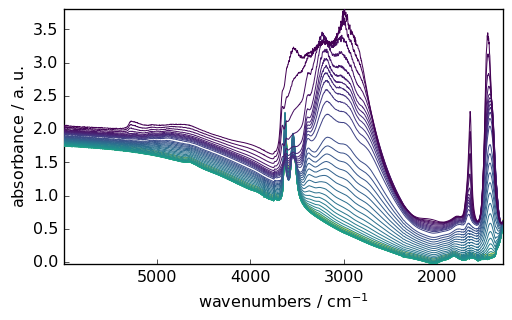

In [4]:
_ = ndp.plot()

Remove a basic linear baseline using \`basc\`:


In [5]:
ndp = ndp.basc()

Make it positive


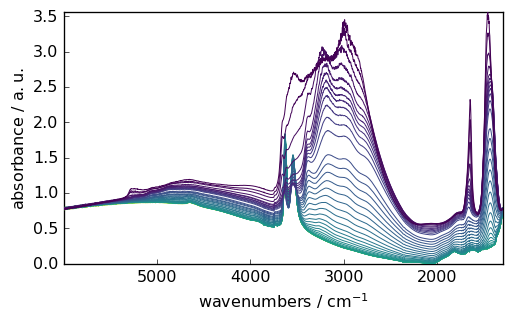

In [6]:
offset = ndp.min()
ndp -= offset
_ = ndp.plot()

Define the Baseline object for a multivariate baseline correction model.
The [n_components]{.title-ref} parameter is the number of components to
use for the multivariate baseline correction. The [model]{.title-ref}
parameter is the baseline correction model to use, here a
[pchip]{.title-ref} interpolation (piecewise cubic Hermite
interpolation).


In [7]:
blc = scp.Baseline(
    log_level="INFO",
    multivariate=True,  # use a multivariate baseline correction approach
    model="polynomial",  # use a polynomial model
    order="pchip",  # with a pchip interpolation method
    n_components=5,
)

Now we select the regions ( [ranges]{.title-ref} ) to use for the
baseline correction.


In [8]:
blc.ranges = [
    [1556.30, 1568.26],
    [1795.00, 1956.75],
    [3766.03, 3915.81],
    [4574.26, 4616.04],
    [4980.10, 4998.01],
    [5437.52, 5994.70],
]

We can now fit the baseline correction model to the data:


In [9]:
_ = blc.fit(ndp)

The baseline is now stored in the [baseline]{.title-ref} attribute of
the processor: (note that the baseline is a NDDataset too). The
corrected dataset (the dataset after the baseline subtraction) is stored
in the [corrected]{.title-ref} attribute of the processor:


In [10]:
baseline = blc.baseline
corrected = blc.corrected

Plot the result of the correction


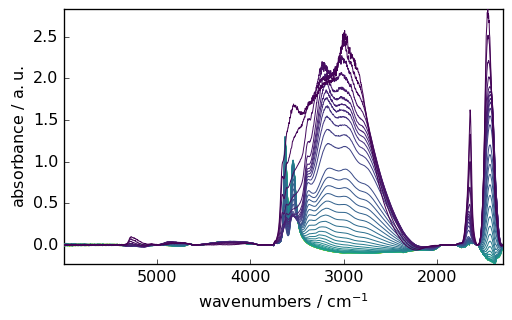

In [11]:
_ = corrected.plot()

We can have a more detailed representation using plot


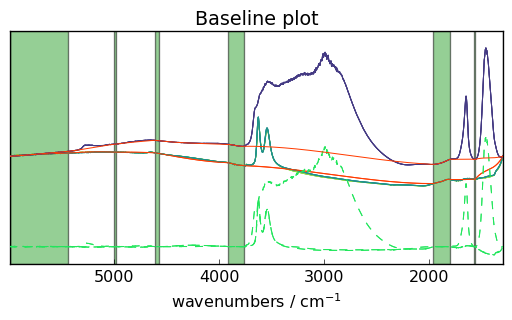

In [12]:
ax = blc.plot(nb_traces=2, offset=50)
blc.show_regions(ax)

We can also plot the baseline and the corrected dataset together: for
some individual spectra to, for example, check the quality of the
correction:


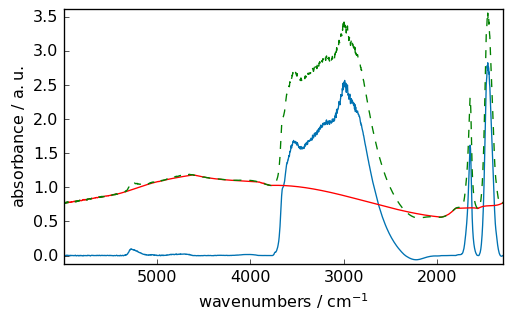

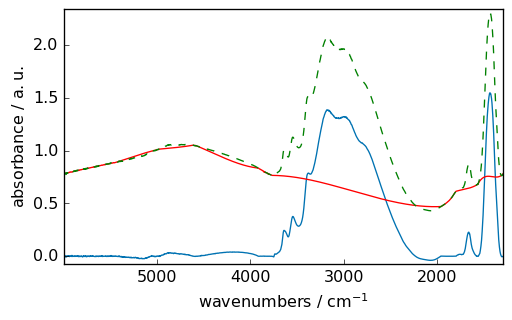

In [13]:
_ = corrected[0].plot()
_ = baseline[0].plot(clear=False, color="red", ls="-")
_ = ndp[0].plot(clear=False, color="green", ls="--")

_ = corrected[10].plot()
_ = baseline[10].plot(clear=False, color="red", ls="-")
_ = ndp[10].plot(clear=False, color="green", ls="--")

The baseline correction looks ok in some part of the spectra but not in
others where the variation seems a little to rigid. This is may be due
to the fact that the [pchip]{.title-ref} interpolation is perhaps not
the best choice for this dataset. We can try to use a n-th degree
[polynomial]{.title-ref} model instead:


We don\'t need to redefine a new Baseline object, we can just change the
model and the order of the polynomial:


In [14]:
blc.model = "polynomial"
blc.order = 5  # use a 5th degree polynomial

and fit again the baseline correction model to the data:


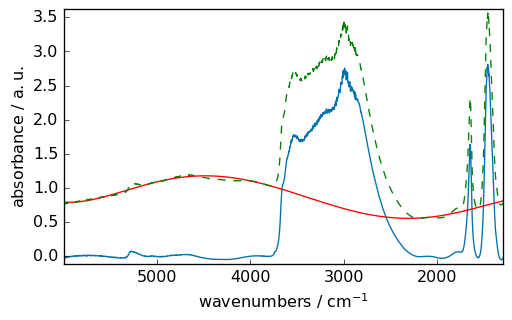

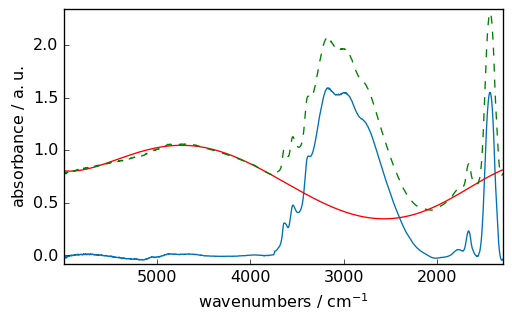

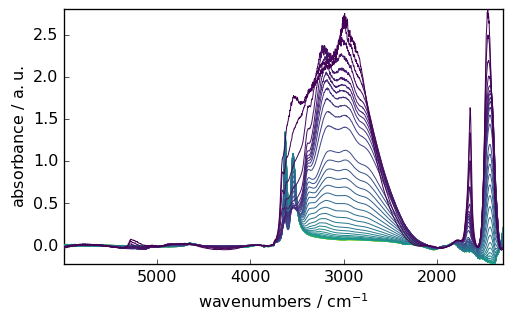

In [15]:
blc.fit(ndp)

baseline = blc.baseline
corrected = blc.corrected

_ = corrected[0].plot()
_ = baseline[0].plot(clear=False, color="red", ls="-")
_ = ndp[0].plot(clear=False, color="green", ls="--")

_ = corrected[10].plot()
_ = baseline[10].plot(clear=False, color="red", ls="-")
_ = ndp[10].plot(clear=False, color="green", ls="--")

_ = corrected.plot()

This looks better and smoother. But not perfect.


We can also try to use a [asls]{.title-ref} (Asymmetric Least Squares)
model instead. This model is based on the work of Eilers and Boelens
(2005) and performs a baseline correction by iteratively fitting
asymmetrically weighted least squares regression curves to the data. The
[asls]{.title-ref} model has two parameters: [mu]{.title-ref} and
[assymetry]{.title-ref}. The [mu]{.title-ref} parameter is a
regularisation parameters which control the smoothness of the baseline.
The larger [mu]{.title-ref} is, the smoother the baseline will be. The
[assymetry]{.title-ref} parameter is a parameter which control the
assymetry if the AsLS algorithm.


 99999.49622650011


 0.24660331763260296


 0.14665656358795823


 0.08444480851935286


 0.0785295924636494


 0.038550890845791524


 0.02162113454843334


 0.014278107720663527


 0.012238378046283024


 0.005915216055703461


 0.005915216055703462


 0.003875486381322957


 0.0034675404464468568


 0.004079459348761008


 0.001019864837190252


 0.0


 Convergence reached in 15 iterations


 99999.49133114889


 0.2565979930370674


 0.1413532664345689


 0.0805693221380299


 0.06241572803604341


 0.037531026008601275


 0.025088674994880197


 0.006935080892893713


 0.006935080892893713


 0.006119189023141511


 0.00530329715338931


 0.003875486381322957


 0.00550727012082736


 0.0024476756092566047


 0.0012238378046283023


 0.00040794593487610074


 Convergence reached in 15 iterations


 99999.50234568912


 0.24599139873028875


 0.14441286094613967


 0.0826090518124104


 0.06282367397091952


 0.04405816096661888


 0.020397296743805037


 0.01631783739504403


 0.006731107925455663


 0.008566864632398115


 0.0034675404464468563


 0.0028556215441327055


 0.001427810772066353


 0.0006119189023141512


 Convergence reached in 13 iterations


 99999.49133114889


 0.2519066147859922


 0.14176121236944503


 0.08668851116117142


 0.056704484947778015


 0.04079459348761008


 0.027128404669260704


 0.015705918492729877


 0.008158918697522015


 0.009178783534712267


 0.0036715134138849063


 0.0012238378046283025


 0.00040794593487610074


 Convergence reached in 12 iterations


 99999.49194306778


 0.25027483104648784


 0.13890559082531231


 0.09219578128199876


 0.053644890436207245


 0.03181978292033587


 0.024884702027442147


 0.011626459143968872


 0.010810567274216669


 0.0069350808928937135


 0.002039729674380504


 0.0


 Convergence reached in 11 iterations


 99999.50724104035


 0.24089207454433748


 0.13706983411836987


 0.0817931599426582


 0.052013106696702845


 0.03181978292033586


 0.02100921564611919


 0.013870161785787427


 0.010402621339340569


 0.0034675404464468563


 0.001631783739504403


 0.0


 Convergence reached in 11 iterations


 99999.49357485153


 0.24741920950235513


 0.13217448289985662


 0.08281302477984845


 0.046709809543313545


 0.029984026213393408


 0.022029080483309437


 0.01672578332992013


 0.011830432111406922


 0.0044874052836371085


 0.002039729674380504


 0.00020397296743805037


 Convergence reached in 11 iterations


 99999.496838419


 0.25517018226500104


 0.13217448289985664


 0.08240507884497236


 0.05405283637108335


 0.02366086422281384


 0.02039729674380504


 0.009994675404464469


 0.009178783534712267


 0.004691378251075159


 0.0008158918697522015


 Convergence reached in 10 iterations


 99999.49928609462


 0.24619537169772682


 0.12544337497440097


 0.07791767356133524


 0.04854556625025599


 0.019377431906614787


 0.021009215646119187


 0.010198648371902519


 0.005711243088265411


 0.007954945730083965


 0.002651648576694655


 0.0012238378046283023


 0.0


 Convergence reached in 12 iterations


 99999.49765431088


 0.25109072291624


 0.1274831046487815


 0.0805693221380299


 0.04283432316199059


 0.021417161580995294


 0.03365553962727831


 0.014890026622977677


 0.006731107925455662


 0.002651648576694655


 0.001019864837190252


 0.0


 Convergence reached in 11 iterations


 99999.49398279747


 0.24293180421871802


 0.1323784558672947


 0.07689780872414499


 0.03977472865041982


 0.02039729674380504


 0.028556215441327054


 0.011830432111406922


 0.006323161990579562


 0.003875486381322957


 0.00040794593487610074


 Convergence reached in 10 iterations


 99999.49581855418


 0.2441556420233463


 0.1323784558672947


 0.06853491705918492


 0.03793897194347737


 0.025292647962318247


 0.018765513004300637


 0.009994675404464469


 0.005711243088265411


 0.0016317837395044032


 0.00040794593487610074


 Convergence reached in 10 iterations


 99999.49847020274


 0.23742453409789066


 0.129522834323162


 0.0797534302682777


 0.04344624206430473


 0.029576080278517308


 0.013666188818349375


 0.00550727012082736


 0.005711243088265411


 0.002039729674380504


 0.0006119189023141512


 Convergence reached in 10 iterations


 99999.49337087855


 0.23660864222813846


 0.13401023960679911


 0.07812164652877329


 0.039570755682981774


 0.031003891050583657


 0.01631783739504403


 0.008158918697522015


 0.0044874052836371085


 0.0034675404464468563


 0.0006119189023141512


 Convergence reached in 10 iterations


 99999.49867417572


 0.24130002047921362


 0.129522834323162


 0.07914151136596355


 0.039774728650419824


 0.030595945115707558


 0.012442351013721074


 0.008974810567274217


 0.0048953512185132084


 0.001631783739504403


 0.00040794593487610074


 Convergence reached in 10 iterations


 99999.49622650011


 0.24211591234896584


 0.13135859103010444


 0.08118124104034405


 0.047729674380503795


 0.02692443170182265


 0.010810567274216669


 0.007954945730083965


 0.0028556215441327055


 0.0014278107720663525


 0.00040794593487610074


 Convergence reached in 10 iterations


 99999.49643047307


 0.24517550686053655


 0.13523407741142743


 0.08260905181241042


 0.041814458324800324


 0.0267204587343846


 0.011626459143968872


 0.008362891664960065


 0.002039729674380504


 0.0006119189023141512


 Convergence reached in 9 iterations


 99999.49602252714


 0.24354372312103217


 0.13033872619291417


 0.08995207864018022


 0.04018267458529593


 0.025088674994880197


 0.012646323981159124


 0.008566864632398115


 0.003671513413884907


 0.0018357567069424532


 0.00020397296743805037


 Convergence reached in 10 iterations


 99999.49439074339


 0.25313045259062056


 0.1266672127790293


 0.07322629531026009


 0.04772967438050378


 0.025088674994880197


 0.013054269916035224


 0.004691378251075159


 0.003059594511570756


 0.001019864837190252


 0.00040794593487610074


 Convergence reached in 10 iterations


 99999.50356952693


 0.25863772271144786


 0.12381159123489659


 0.07322629531026009


 0.043242269096866674


 0.023864837190251897


 0.009790702437026419


 0.00530329715338931


 0.002039729674380504


 0.00040794593487610074


 Convergence reached in 9 iterations


 99999.50234568912


 0.25251853368830635


 0.1344181855416752


 0.06914683596149908


 0.04385418799918083


 0.03161580995289781


 0.015501945525291829


 0.004895351218513209


 0.0018357567069424536


 0.00040794593487610074


 Convergence reached in 9 iterations


 99999.50010198649


 0.25353839852549664


 0.13747778005324596


 0.07648986278926889


 0.04405816096661888


 0.02345689125537579


 0.012646323981159122


 0.00550727012082736


 0.002447675609256605


 0.0012238378046283025


 0.0


 Convergence reached in 10 iterations


 99999.51030063485


 0.26026950645095226


 0.12972680729060004


 0.06812697112430882


 0.04446610690149498


 0.02243702641818554


 0.011830432111406922


 0.0069350808928937135


 0.002039729674380504


 0.00020397296743805037


 Convergence reached in 9 iterations


 99999.50152979726


 0.2555781281998771


 0.1340102396067991


 0.06486340364530002


 0.039774728650419824


 0.03712308007372517


 0.01631783739504403


 0.008974810567274217


 0.003875486381322957


 0.00040794593487610074


 Convergence reached in 9 iterations


 99999.51601187795


 0.2512946958836781


 0.13217448289985664


 0.06629121441736636


 0.037123080073725175


 0.03528732336678271


 0.015501945525291829


 0.013462215850911324


 0.012442351013721074


 0.004079459348761008


 0.001019864837190252


 0.0


 Convergence reached in 11 iterations


 99999.50887282408


 0.25843374974400984


 0.13013475322547613


 0.0797534302682777


 0.037123080073725175


 0.04120253942248618


 0.017541675199672334


 0.02121318861355724


 0.02284497235306164


 0.01081056727421667


 0.00530329715338931


 0.0018357567069424536


 0.00040794593487610074


 Convergence reached in 12 iterations


 99999.51132049969


 0.2529264796231825


 0.1299307802580381


 0.0793454843334016


 0.041406512389924224


 0.040386647552733974


 0.016521810362482077


 0.022029080483309437


 0.01917345893917673


 0.006731107925455663


 0.004079459348761008


 0.002855621544132705


 0.0006119189023141512


 Convergence reached in 12 iterations


 99999.51009666189


 0.25251853368830635


 0.12727913168134342


 0.08362891664960066


 0.049565431087446245


 0.04772967438050379


 0.022640999385623594


 0.01611386442760598


 0.008974810567274217


 0.006323161990579562


 0.005099324185951259


 0.0028556215441327055


 0.001019864837190252


 0.00040794593487610074


 Convergence reached in 13 iterations


 99999.51662379685


 0.2596575875486381


 0.12707515871390537


 0.08770837599836166


 0.039978701617857874


 0.03651116117141102


 0.025496620929756297


 0.014686053655539629


 0.010198648371902519


 0.005711243088265411


 0.0034675404464468568


 0.002855621544132705


 0.002447675609256605


 0.0006119189023141512


 Convergence reached in 13 iterations


 99999.51784763465


 0.24089207454433748


 0.13033872619291417


 0.06649518738480444


 0.07098259266844155


 0.05854024165472045


 0.03222772885521196


 0.01733770223223428


 0.008362891664960067


 0.007954945730083967


 0.004283432316199058


 0.003875486381322957


 0.0034675404464468568


 0.0018357567069424536


 0.0008158918697522015


 Convergence reached in 14 iterations


 99999.51621585092


 0.24599139873028875


 0.14196518533688307


 0.05854024165472045


 0.05609256604546385


 0.04324226909686668


 0.023456891255375794


 0.017949621134548434


 0.008770837599836167


 0.008974810567274217


 0.00550727012082736


 0.00530329715338931


 0.003671513413884907


 0.0024476756092566047


 0.002039729674380504


 0.0008158918697522015


 Convergence reached in 15 iterations


 99999.51927544542


 0.2527225066557444


 0.13135859103010444


 0.062007782101167315


 0.06200778210116732


 0.04385418799918083


 0.024476756092566044


 0.01652181036248208


 0.010606594306778622


 0.0071390538603317635


 0.006527134958017612


 0.0044874052836371085


 0.0046913782510751584


 0.002039729674380504


 0.00020397296743805037


 Convergence reached in 14 iterations


 99999.51560393201


 0.24497153389309853


 0.14094532049969283


 0.07037067376612738


 0.05486872824083556


 0.039570755682981774


 0.018357567069424534


 0.023660864222813844


 0.011626459143968872


 0.013258242883473277


 0.005915216055703461


 0.00489535121851321


 0.002855621544132705


 0.004283432316199058


 0.001631783739504403


 0.0006119189023141512


 Convergence reached in 15 iterations


 99999.51907147246


 0.2490509932418595


 0.13095064509522836


 0.06486340364530002


 0.04222240425967643


 0.03467540446446856


 0.037123080073725175


 0.01631783739504403


 0.010606594306778622


 0.00530329715338931


 0.006527134958017612


 0.005303297153389311


 0.003671513413884907


 0.0034675404464468563


 0.002039729674380504


 0.001019864837190252


 0.00020397296743805037


 Convergence reached in 16 iterations


 99999.51580790499


 0.24884702027442143


 0.1368658611509318


 0.06363956584067172


 0.06098791726397707


 0.046709809543313545


 0.02896416137620315


 0.019989350808928937


 0.008362891664960065


 0.006119189023141511


 0.00550727012082736


 0.00489535121851321


 0.003671513413884907


 0.003263567479008806


 0.0008158918697522015


 Convergence reached in 14 iterations


 99999.51723571574


 0.25394634446037273


 0.13421421257423713


 0.06547532254761418


 0.051605160761826745


 0.038142944910915424


 0.03528732336678272


 0.013666188818349375


 0.012850296948597175


 0.007343026827769813


 0.0075469997952078635


 0.005915216055703461


 0.0028556215441327055


 0.00489535121851321


 0.001631783739504403


 0.00020397296743805037


 Convergence reached in 15 iterations


 99999.51376817531


 0.2604734794183903


 0.13543805037886547


 0.06343559287323366


 0.05201310669670285


 0.04099856645504813


 0.038550890845791524


 0.01713372926479623


 0.008362891664960065


 0.006731107925455663


 0.007546999795207864


 0.005099324185951259


 0.004895351218513209


 0.002855621544132705


 0.0008158918697522015


 Convergence reached in 14 iterations


 99999.51478804015


 0.2517026418185541


 0.13625394224861764


 0.07669383575670694


 0.04854556625025599


 0.040386647552733974


 0.04018267458529593


 0.01611386442760598


 0.011014540241654722


 0.006527134958017611


 0.007139053860331762


 0.005915216055703462


 0.0018357567069424536


 0.005099324185951259


 0.002039729674380504


 0.00020397296743805037


 Convergence reached in 15 iterations


 99999.51397214826


 0.2574138849068196


 0.14155723940200696


 0.06261970100348146


 0.04467007986893304


 0.058744214622158515


 0.02733237763669875


 0.017745648167110387


 0.011014540241654722


 0.009586729469588367


 0.006527134958017612


 0.004691378251075159


 0.002855621544132705


 0.0034675404464468563


 0.001631783739504403


 0.00040794593487610074


 Convergence reached in 15 iterations


 99999.52539463446


 0.25211058775343026


 0.13870161785787424


 0.06996272783125128


 0.038550890845791524


 0.041202539422486174


 0.03283964775752612


 0.015297972557853779


 0.013666188818349375


 0.008158918697522015


 0.007954945730083967


 0.005099324185951259


 0.004283432316199058


 0.0022437026418185542


 0.002855621544132705


 0.001019864837190252


 0.00020397296743805037


 Convergence reached in 16 iterations


 99999.51397214828


 0.2553741552324391


 0.1429850501740733


 0.06608724144992832


 0.042018431292238374


 0.047117755478189645


 0.036715134138849075


 0.012850296948597175


 0.012850296948597174


 0.0069350808928937135


 0.00530329715338931


 0.006119189023141511


 0.004283432316199058


 0.003875486381322957


 0.003263567479008806


 0.001631783739504403


 0.0


 Convergence reached in 16 iterations


 99999.52498668851


 0.25394634446037273


 0.13808969895556011


 0.06731107925455662


 0.04222240425967643


 0.03406348556215441


 0.042018431292238374


 0.01754167519967233


 0.008770837599836167


 0.009178783534712267


 0.006323161990579561


 0.005915216055703461


 0.0030595945115707555


 0.0044874052836371085


 0.0014278107720663525


 0.00020397296743805037


 Convergence reached in 15 iterations


 99999.52090722918


 0.2498668851116117


 0.1429850501740733


 0.061191890231415115


 0.048953512185132095


 0.05364489043620726


 0.04568994470612329


 0.01835756706942453


 0.008974810567274217


 0.009994675404464467


 0.006323161990579562


 0.006935080892893713


 0.00571124308826541


 0.002651648576694655


 0.003671513413884907


 0.0008158918697522015


 Convergence reached in 15 iterations


 99999.50968871596


 0.26006553348351424


 0.14237313127175918


 0.06445545771042394


 0.042630350194552524


 0.04528199877124719


 0.03426745852959247


 0.016521810362482077


 0.012850296948597175


 0.0071390538603317635


 0.008974810567274217


 0.0046913782510751584


 0.003671513413884907


 0.00571124308826541


 0.0012238378046283023


 0.00020397296743805037


 Convergence reached in 15 iterations


 99999.51621585092


 0.2602695064509523


 0.1454327257833299


 0.06731107925455662


 0.04140651238992423


 0.05323694450133115


 0.027740323571574854


 0.027740323571574854


 0.014278107720663527


 0.01060659430677862


 0.005711243088265411


 0.005915216055703461


 0.004079459348761008


 0.005099324185951259


 0.0014278107720663528


 0.0006119189023141512


 Convergence reached in 15 iterations


 99999.52111120212


 0.2541503174278108


 0.14359696907638747


 0.06527134958017612


 0.04405816096661889


 0.039774728650419824


 0.037327053041163225


 0.01672578332992013


 0.014278107720663527


 0.008158918697522015


 0.007954945730083965


 0.004691378251075159


 0.0024476756092566047


 0.0042834323161990585


 0.0018357567069424536


 0.0006119189023141512


 Convergence reached in 15 iterations


 99999.52437476961


 0.2447675609256604


 0.14074134753225476


 0.06404751177554782


 0.04467007986893304


 0.039570755682981774


 0.03487937743190662


 0.015501945525291829


 0.008566864632398115


 0.008974810567274217


 0.00571124308826541


 0.0034675404464468568


 0.003263567479008806


 0.002651648576694655


 0.00040794593487610074


 Convergence reached in 14 iterations


 99999.51968339135


 0.25353839852549664


 0.14563669875076798


 0.07485807904976449


 0.047729674380503795


 0.03447143149703052


 0.039774728650419824


 0.018765513004300634


 0.009790702437026419


 0.007546999795207864


 0.006527134958017612


 0.00509932418595126


 0.002855621544132705


 0.004283432316199058


 0.0018357567069424536


 0.00040794593487610074


 Convergence reached in 15 iterations


 99999.50785295924


 0.2725078844972353


 0.14237313127175916


 0.07546999795207865


 0.04691378251075158


 0.03569526930165882


 0.04242637722711448


 0.01835756706942453


 0.008974810567274217


 0.0071390538603317635


 0.006527134958017611


 0.00550727012082736


 0.0018357567069424532


 0.004283432316199058


 0.001019864837190252


 0.0


 Convergence reached in 15 iterations


 99999.52090722916


 0.259045668646324


 0.13747778005324596


 0.06425148474298586


 0.04650583657587549


 0.04589391767356134


 0.036919107106287125


 0.023864837190251897


 0.011422486176530822


 0.008770837599836167


 0.007750972762645915


 0.005099324185951259


 0.0024476756092566047


 0.00530329715338931


 0.001631783739504403


 0.0008158918697522015


 Convergence reached in 15 iterations


 99999.51805160762


 0.26067745238582835


 0.1470645095228343


 0.07383821421257424


 0.039366782715543724


 0.038550890845791524


 0.038550890845791524


 0.020193323776366987


 0.012442351013721074


 0.007546999795207864


 0.008974810567274217


 0.006731107925455662


 0.0034675404464468563


 0.004691378251075159


 0.0024476756092566047


 0.00020397296743805037


 Convergence reached in 15 iterations


 99999.52049928323


 0.26169731722301864


 0.14196518533688307


 0.06506737661273808


 0.03773499897603932


 0.03773499897603932


 0.03814294491091543


 0.01774564816711038


 0.009586729469588367


 0.0069350808928937135


 0.00611918902314151


 0.004079459348761008


 0.003875486381322957


 0.0022437026418185542


 0.0030595945115707555


 0.0006119189023141512


 Convergence reached in 15 iterations


 99999.51825558058


 0.25394634446037273


 0.14094532049969283


 0.06669916035224248


 0.04283432316199059


 0.042630350194552524


 0.029984026213393408


 0.015501945525291825


 0.013258242883473277


 0.008158918697522015


 0.0071390538603317635


 0.00530329715338931


 0.004079459348761008


 0.003671513413884907


 0.0014278107720663525


 0.0


 Convergence reached in 15 iterations


 99999.5143800942


 0.2541503174278108


 0.14155723940200698


 0.06853491705918492


 0.04854556625025599


 0.050177349989760395


 0.0509932418595126


 0.022844972353061644


 0.009586729469588367


 0.0075469997952078635


 0.007139053860331764


 0.00591521605570346


 0.0024476756092566047


 0.004895351218513209


 0.0008158918697522015


 Convergence reached in 14 iterations


 99999.5119324186


 0.25924964161376207


 0.1454327257833299


 0.06669916035224248


 0.038754863813229574


 0.043242269096866674


 0.03691910710628712


 0.01794962113454843


 0.013054269916035224


 0.006731107925455663


 0.006527134958017612


 0.00530329715338931


 0.0022437026418185542


 0.003263567479008806


 0.0014278107720663525


 0.00020397296743805037


 Convergence reached in 15 iterations


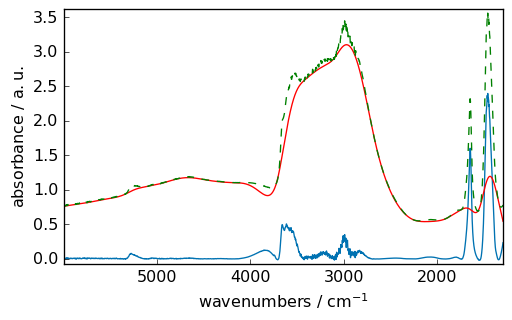

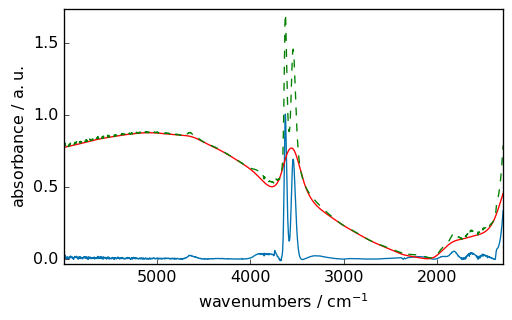

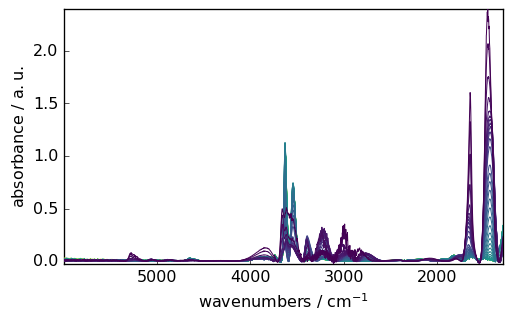

In [16]:
blc.multivariate = False  # use a sequential approach
blc.model = "asls"
blc.mu = 10**9
blc.asymmetry = 0.002
blc.fit(ndp)

baseline = blc.baseline
corrected = blc.corrected

_ = corrected[0].plot()
_ = baseline[0].plot(clear=False, color="red", ls="-")
_ = ndp[0].plot(clear=False, color="green", ls="--")

_ = corrected[-1].plot()
_ = baseline[-1].plot(clear=False, color="red", ls="-")
_ = ndp[-1].plot(clear=False, color="green", ls="--")

_ = corrected.plot()

Finally, we will use the snip model


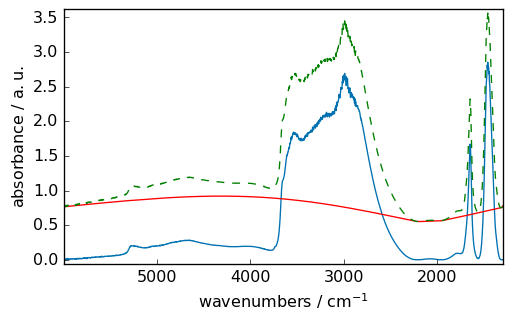

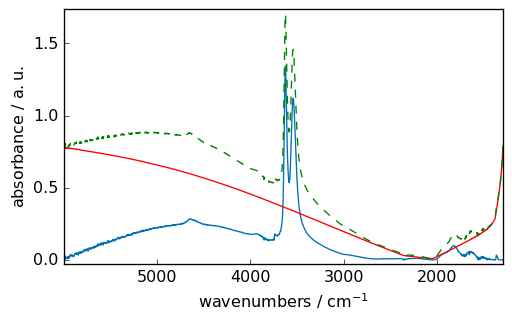

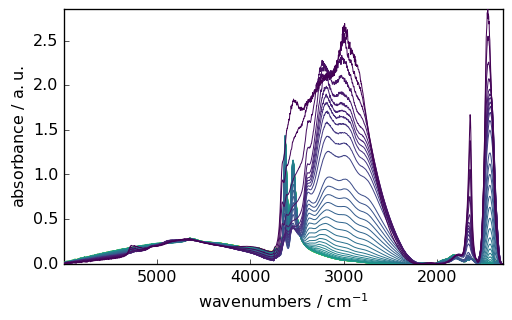

In [17]:
blc.multivariate = False  # use a sequential approach
blc.model = "snip"
blc.snip_width = 200
blc.fit(ndp)

baseline = blc.baseline
corrected = blc.corrected

_ = corrected[0].plot()
_ = baseline[0].plot(clear=False, color="red", ls="-")
_ = ndp[0].plot(clear=False, color="green", ls="--")

_ = corrected[-1].plot()
_ = baseline[-1].plot(clear=False, color="red", ls="-")
_ = ndp[-1].plot(clear=False, color="green", ls="--")

_ = corrected.plot()

This ends the example ! The following line can be uncommented if no plot
shows when running the .py script with python


In [18]:
# scp.show()